In [1]:
import sys
import xarray as xr
import numpy as np
import pandas as pd
import math
import glob
import yaml
import geopandas as gpd
import shapely.geometry
import cartopy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import matplotlib.ticker as mticker
import cmocean.cm as cmo

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
import dask

# import personal modules
# Path to modules
sys.path.append('../modules')
# Import my modules
from utils import roundPartial, select_months_ds
from plotter import draw_basemap, plot_terrain, plot_arscale_cbar
from colorline import colorline

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [2]:
server='expanse'
if server == 'comet':
    path_to_data = '/data/projects/Comet/cwp140/'
elif server == 'expanse':
    path_to_data = '/expanse/nfs/cw3e/cwp140/'
elif server == 'skyriver':
    path_to_data = '/home/dnash/comet_data/'
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
HUC8_ID = '14050001'
HUC8_lbl = 'Upper Yampa'
fname = path_to_data + 'preprocessed/ERA5_trajectories/combined/PRISM_HUC8_{0}.nc'.format(HUC8_ID)
ds = xr.open_dataset(fname)

In [4]:
# ds_lst = []
# for i, HUC8_ID in enumerate(HUC8_lst):
#     fname = '/home/dnash/comet_data/preprocessed/ERA5_trajectories/latest/PRISM_HUC8_{0}.nc'.format(HUC8_ID)
#     ds = xr.open_dataset(fname)
#     ds_lst.append(ds)
    
# ## concat ds_lst along HUC8 index
# ds = xr.concat(ds_lst, pd.Index(HUC8_lst, name="HUC8"))
# ds

In [8]:
AR = ds.where(ds.ar_scale > 0, drop=True).ar_scale
da_groupby_monthly = AR.groupby('start_date.month').count(['start_date'])
## calculate monthly count (interannual time series)
monthly_count = AR.resample(start_date='1MS').count(['start_date'])

In [10]:
monthly_count

<xarray.DataArray 'ar_scale' (start_date: 288)>
array([ 3.,  6.,  1.,  1.,  2.,  1., nan, nan,  1.,  1., nan,  2.,  1.,
        1.,  1.,  3.,  2., nan, nan,  1., nan,  3.,  1.,  3.,  1.,  3.,
       nan,  1., nan, nan, nan,  1.,  2., nan,  4.,  2.,  2.,  2.,  3.,
       nan,  1., nan, nan, nan,  1., nan,  2.,  4.,  5.,  1.,  3.,  1.,
        1., nan, nan, nan,  4.,  5.,  3.,  3.,  6.,  4.,  4., nan, nan,
       nan, nan,  1., nan,  2.,  4.,  4.,  8.,  4.,  4.,  4., nan, nan,
       nan,  1., nan,  1.,  2.,  2.,  1.,  1.,  1., nan,  1.,  1., nan,
       nan,  3.,  4., nan,  8.,  6.,  8.,  1.,  2., nan, nan, nan, nan,
        1.,  2.,  3.,  6.,  6.,  2.,  1.,  1.,  2.,  3., nan, nan,  1.,
       nan, nan, nan,  4.,  2.,  1.,  3.,  2.,  1., nan,  1.,  1.,  1.,
        1.,  5.,  8.,  4.,  6.,  4.,  4., nan,  1., nan,  1.,  1.,  1.,
        1.,  4.,  2.,  1., nan,  1., nan, nan, nan, nan, nan,  1.,  3.,
        1.,  2.,  2.,  4.,  1., nan, nan, nan,  1.,  1.,  1., nan,  8.,
        4.,  3.,  2.,  1., nan, nan,  1., nan,  2.,  3.,  1., nan,  2.,
        1., nan,  1., nan,  1., nan,  3., nan,  1.,  5.,  4.,  2.,  3.,
        1., nan, nan, nan, nan, nan,  1.,  1.,  3.,  7.,  4., nan,  1.,
        1., nan, nan, nan,  1., nan,  3.,  1.,  4.,  3., nan,  4., nan,
        1., nan, nan, nan,  2.,  3.,  3.,  2.,  6.,  5.,  1.,  2.,  1.,
       nan, nan, nan,  5.,  1.,  4.,  7.,  4.,  1., nan,  2., nan, nan,
       nan, nan, nan,  3.,  2.,  1.,  2., nan, nan, nan, nan, nan, nan,
       nan,  3.,  1.,  6.,  4., nan,  1.,  1.,  2., nan, nan, nan, nan,
        1.,  1.,  5.,  4.,  1.,  3., nan, nan, nan,  1., nan,  1.,  1.,
        2.,  3.])
Coordinates:
  * start_date  (start_date) datetime64[ns] 2000-01-01 2000-02-01 ... 2023-12-01

In [9]:
# ds_lst = []
# ds_lst2 = []
# for j in range(1, 6):
#     AR = ds.where(ds.ar_scale == j, drop=True).ar_scale
#     ## calculate monthly count (annual time series)
#     da_groupby_monthly = AR.groupby('start_date.month').count(['start_date', 'HUC8'])
#     ds_lst.append(da_groupby_monthly)
    
#     ## calculate monthly count (interannual time series)
#     monthly_count = AR.resample(start_date='1MS').count(['start_date', 'HUC8'])
#     ds_lst2.append(monthly_count)
    
# ## concat ds_lst along HUC8 index
# ds = xr.concat(ds_lst, pd.Index([1, 2, 3, 4, 5], name="AR Scale"))
# ds2 = xr.concat(ds_lst2, pd.Index([1, 2, 3, 4, 5], name="arscale"))

In [11]:
# # libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # set seaborn style
# sns.set_theme()

# colors = ['#0ac1ff', '#04ff03', '#ffff03', '#ffa602', '#ff0100']
 
# # Data
# x=ds.month.values
# y=ds.values
 
# # Plot
# plt.stackplot(x,y, labels=['AR1','AR2','AR3','AR4','AR5'], colors=colors)
# plt.legend(loc='upper left')
# plt.show()

In [79]:
ds2

<xarray.DataArray 'ar_scale' (arscale: 5, start_date: 240)>
array([[ 1., nan, nan, ..., nan,  2., nan],
       [nan, nan,  1., ..., nan,  2.,  1.],
       [ 8., nan, nan, ..., nan,  2.,  5.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * start_date  (start_date) datetime64[ns] 2000-01-01 2000-02-01 ... 2019-12-01
  * arscale     (arscale) int64 1 2 3 4 5

In [62]:
## create datetime labels for the x-axis
date_lst = ds2.start_date.values
xtck_lbl = []
for i, x in enumerate(date_lst):
    t = pd.to_datetime(str(x))
    xtck_lbl.append(t.strftime('%Y-%m'))
    


In [65]:
# create DataFrame
xtcks = np.arange(0, len(date_lst), 1)
df = pd.DataFrame({'AR1': ds2.sel(arscale=1).values,
                   'AR2': ds2.sel(arscale=2).values,
                   'AR3': ds2.sel(arscale=3).values,
                   'AR4': ds2.sel(arscale=4).values,
                   'AR5': ds2.sel(arscale=5).values},
                  index=xtcks)

df

,AR1,AR2,AR3,AR4,AR5
0,1.0,NaN,8.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,3.0,2.0,NaN
...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN
236,NaN,1.0,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN
238,2.0,2.0,2.0,NaN,NaN


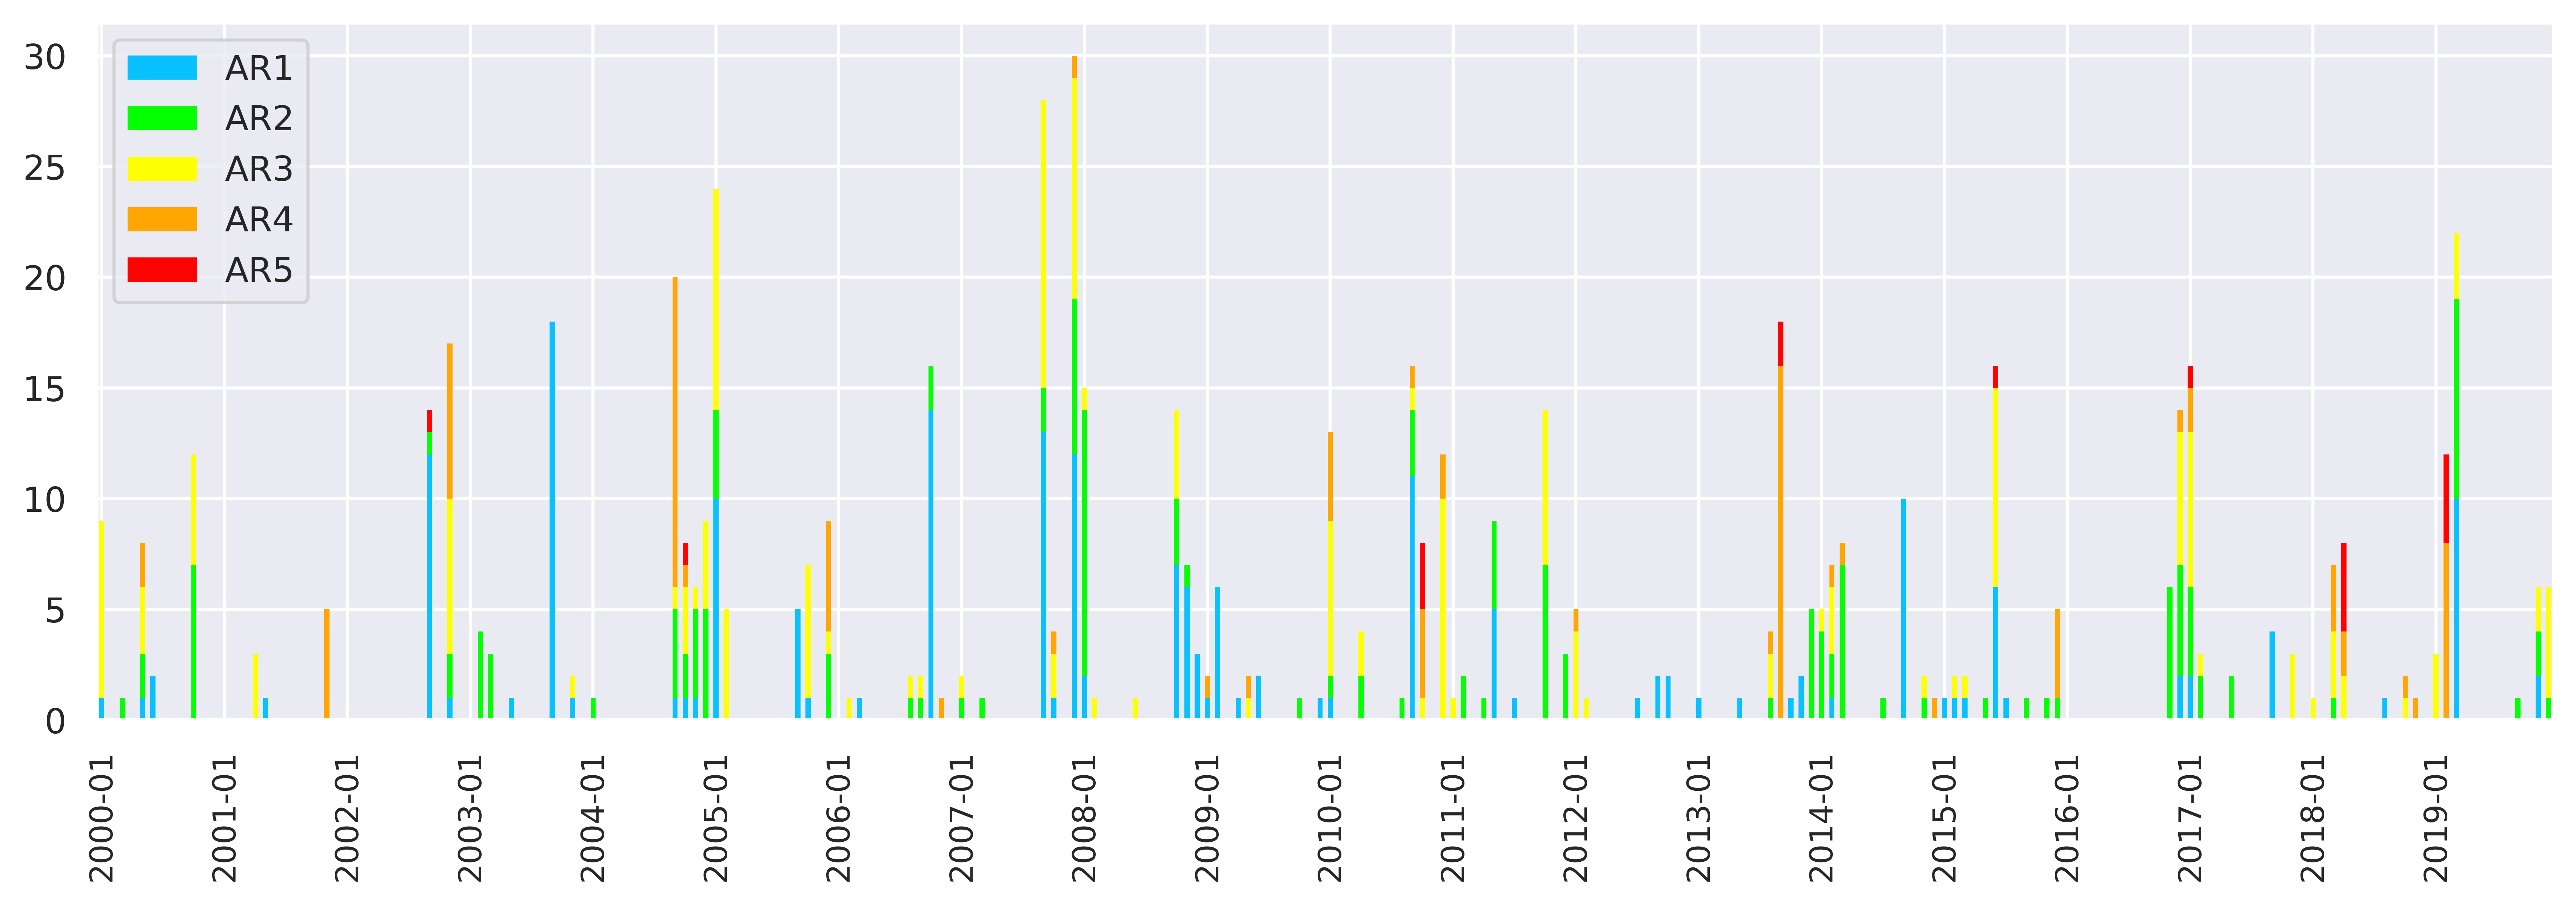

In [80]:
fig = plt.figure(figsize=(14.0, 4.0))
fig.dpi = 600
fname = path_to_figs + 'ARScale_interannual'
fmt = 'png'

nrows = 1
ncols = 1
gs = GridSpec(nrows, ncols, height_ratios=[1], width_ratios = [1], wspace=0.01, hspace=0.1)
ax = fig.add_subplot(gs[0, 0])
df.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='None')
# x = ds2.values
# y = xtcks
# plt.stackplot(x,y, labels=['AR1','AR2','AR3','AR4','AR5'], colors=colors)
  
ax.set_xticks(xtcks[::12]) # set the labels every year
ax.set_xticklabels(xtck_lbl[::12], fontsize=10)

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=False)
plt.show()